In [7]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl
from datetime import timezone

register_matplotlib_converters()

# File locations
#----------------
the_gases = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/q12021/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/pngs/gap_filling/'

In [8]:
# Load the df 
#-------------
oxaria1_status = pd.read_feather(the_gases+'oxaria1_status_q12021_gf.ftr').set_index(['tag','rec'])
oxaria1_status_lt = oxaria1_status.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29]]
del oxaria1_status

# Checking out the data types 
#-----------------------------
oxaria1_status_lt.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1705146 entries, ('scs-bgx-536', Timestamp('2021-01-01 00:00:19+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-05-31 23:59:53+0000', tz='UTC'))
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   val.gps.pos:0      float32
 1   val.gps.pos:1      float32
 2   val.gps.elv        float32
 3   val.gps.qual       float32
 4   val.up.load.av15   float32
 5   val.up.load.av1    float32
 6   val.up.load.av5    float32
 7   val.up.period      object 
 8   val.up.users       float32
 9   val.psu.prot-batt  float32
 10  val.psu.rst        object 
 11  val.psu.chg        float32
 12  val.psu.standby    bool   
 13  val.psu.pwr-in     float32
 14  val.psu.host-3v3   float32
 15  val.psu.batt-flt   bool   
 16  val.tz.name        object 
 17  val.tz.utc-offset  object 
 18  val.tmp.brd        float32
 19  val.psu.src        object 
 20  val.psu.chgr       object 
dtypes: bool(2), float32(13), o

In [9]:
# Some cleaning incase have missed anything
#-------------------------------------------
oxaria1_status_lt = oxaria1_status_lt[~oxaria1_status_lt.index.duplicated(keep='last')].reset_index()
oxaria1_status_lt = oxaria1_status_lt.dropna(axis=0,subset=['tag']).set_index(['tag','rec']).sort_index()

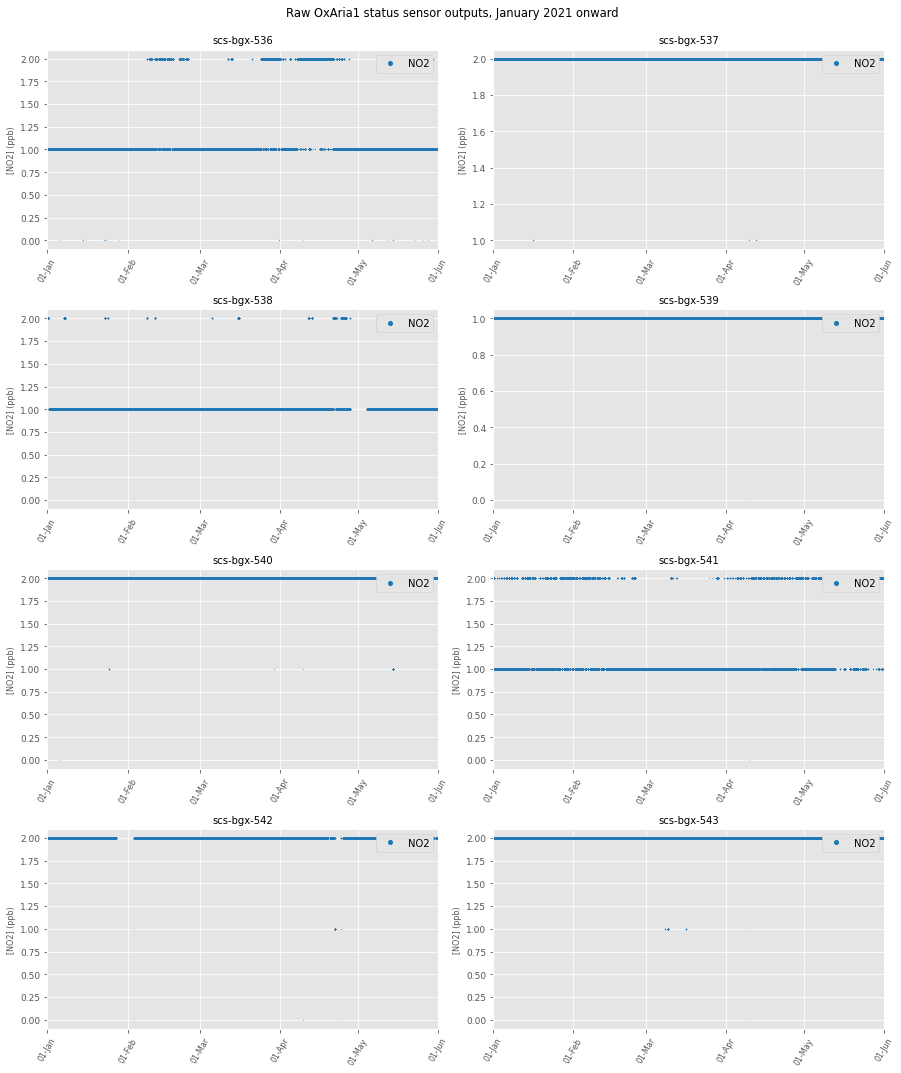

In [10]:
# Check on the outliers & start-ups in the original dataset
# ----------------------------------------------------------
plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%d-%b')
start_date=dt.datetime(2021,1,1)
end_date=dt.datetime(2021,6,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 status sensor outputs, January 2021 onward', fontsize=11.5, y=0.91)

for tag, dat in oxaria1_status_lt.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    dat.plot(y='val.gps.qual', c='tab:blue',linewidth=0.5, marker='o', ms=0.1, ls='', label='NO2', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(tag, fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=60,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='center')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('[NO2] (ppb)', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper right') 
    
plt.show()    
    
for ax in axes_list:
    ax.remove()

In [11]:
# Save the df 
#-------------

# There don't seem to be any outages that need removing so just saving
oxaria1_status_lt.reset_index().to_feather(the_gases+'oxaria1_status_stable_536_q12021.ftr')